In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [15]:
#Read CSV
merge_output = pd.read_csv("./zillow_census_m_OUTPUT.csv")


In [16]:
#Fill NaN with 0 (NaN values are for international migration. We are only interested in domestic migration)
merge_output = merge_output.fillna(0)

In [17]:
#Split County into two County and State columns
county_split = merge_output["County"].str.split(pat=', ', expand=True)
merge_output["State"] = county_split[1]
merge_output.set_index("County")
merge_output.head()

,Unnamed: 0,County,2009IN,2009NET,2009POP1YR,state,county,2010IN,2010NET,2010POP1YR,...,2015 Difference,2016 Difference,2010 Percent Change,2011 Percent Change,2012 Percent Change,2013 Percent Change,2014 Percent Change,2015 Percent Change,2016 Percent Change,State
0,0,"Accomack County, Virginia",431.0,-623.0,721525,969,19,0.0,0.0,0.0,...,374,6025.0,-2.140128,-1.084751,1.345437,-8.350719,5.506571,0.268978,4.321506,Virginia
1,1,"Ada County, Idaho",53433.0,8094.0,145223600,6400,400,25963.0,3388.0,73562720.0,...,14500,24400.0,-8.181316,-7.043949,6.282383,15.661182,4.109589,7.338057,11.504008,Idaho
2,2,"Adair County, Missouri",4792.0,1223.0,2643300,3132,108,2245.0,547.0,1321661.0,...,5400,5400.0,-11.207970,-4.207574,-1.464129,0.000000,5.943536,7.573633,7.040417,Missouri
3,3,"Adams County, Colorado",72717.0,10843.0,140486885,2728,341,36404.0,4927.0,69792974.0,...,35500,31700.0,-3.395785,-0.606061,8.231707,9.746479,13.911704,15.998197,12.315462,Colorado
4,4,"Adams County, Idaho",380.0,-194.0,48692,224,42,192.0,-8.0,27321.0,...,11600,38300.0,-10.820669,-3.340150,2.538787,8.940853,5.429293,6.946108,21.444569,Idaho


In [18]:
#Create column that has net total migration/change in price
net_cols = []
dif_cols = []

years = ['2009','2010', '2011', '2012', '2013', '2014']
for year in years:
    year2 = str(int(year) + 1)

    net_cols.append(f"{year}NET")
    dif_cols.append(f"{year2} Difference")

merge_output["TotalNET"] = merge_output[net_cols].sum(axis=1)
merge_output["Total Difference"] = merge_output[dif_cols].sum(axis=1)

merge_output.head()

,Unnamed: 0,County,2009IN,2009NET,2009POP1YR,state,county,2010IN,2010NET,2010POP1YR,...,2010 Percent Change,2011 Percent Change,2012 Percent Change,2013 Percent Change,2014 Percent Change,2015 Percent Change,2016 Percent Change,State,TotalNET,Total Difference
0,0,"Accomack County, Virginia",431.0,-623.0,721525,969,19,0.0,0.0,0.0,...,-2.140128,-1.084751,1.345437,-8.350719,5.506571,0.268978,4.321506,Virginia,-3173.0,-7161.0
1,1,"Ada County, Idaho",53433.0,8094.0,145223600,6400,400,25963.0,3388.0,73562720.0,...,-8.181316,-7.043949,6.282383,15.661182,4.109589,7.338057,11.504008,Idaho,18043.0,31200.0
2,2,"Adair County, Missouri",4792.0,1223.0,2643300,3132,108,2245.0,547.0,1321661.0,...,-11.207970,-4.207574,-1.464129,0.000000,5.943536,7.573633,7.040417,Missouri,4454.0,-3600.0
3,3,"Adams County, Colorado",72717.0,10843.0,140486885,2728,341,36404.0,4927.0,69792974.0,...,-3.395785,-0.606061,8.231707,9.746479,13.911704,15.998197,12.315462,Colorado,37236.0,86600.0
4,4,"Adams County, Idaho",380.0,-194.0,48692,224,42,192.0,-8.0,27321.0,...,-10.820669,-3.340150,2.538787,8.940853,5.429293,6.946108,21.444569,Idaho,570.0,14100.0


<Figure size 7200x4800 with 0 Axes>

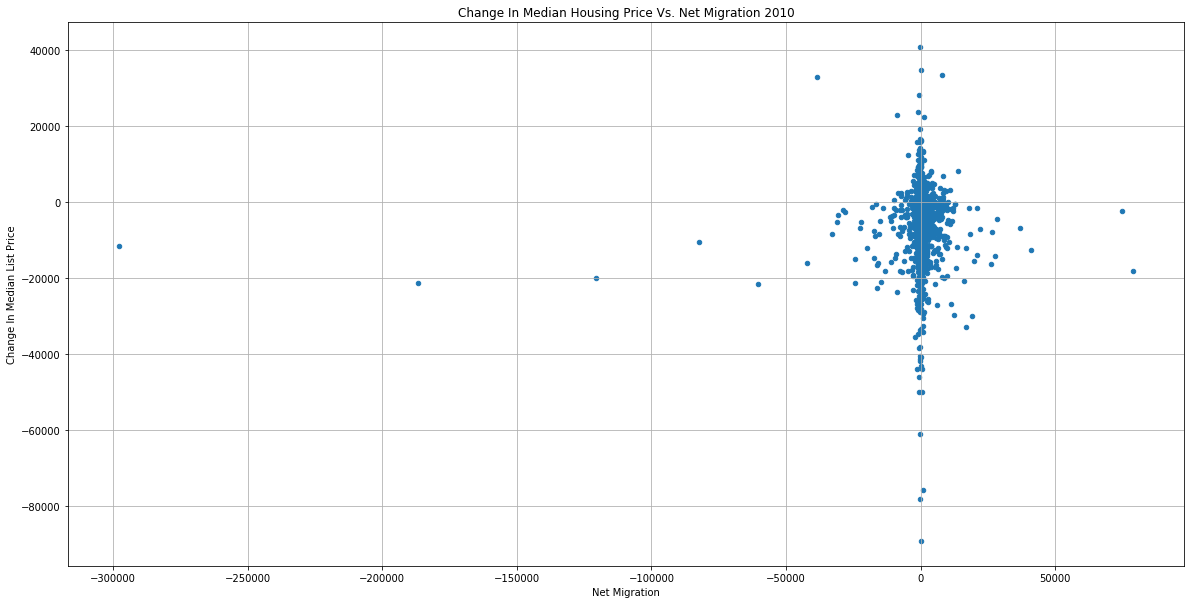

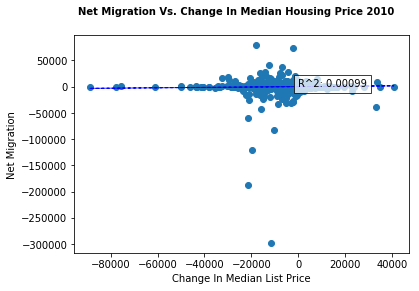

Rsqr: 0.0009851576557355242


<Figure size 7200x4800 with 0 Axes>

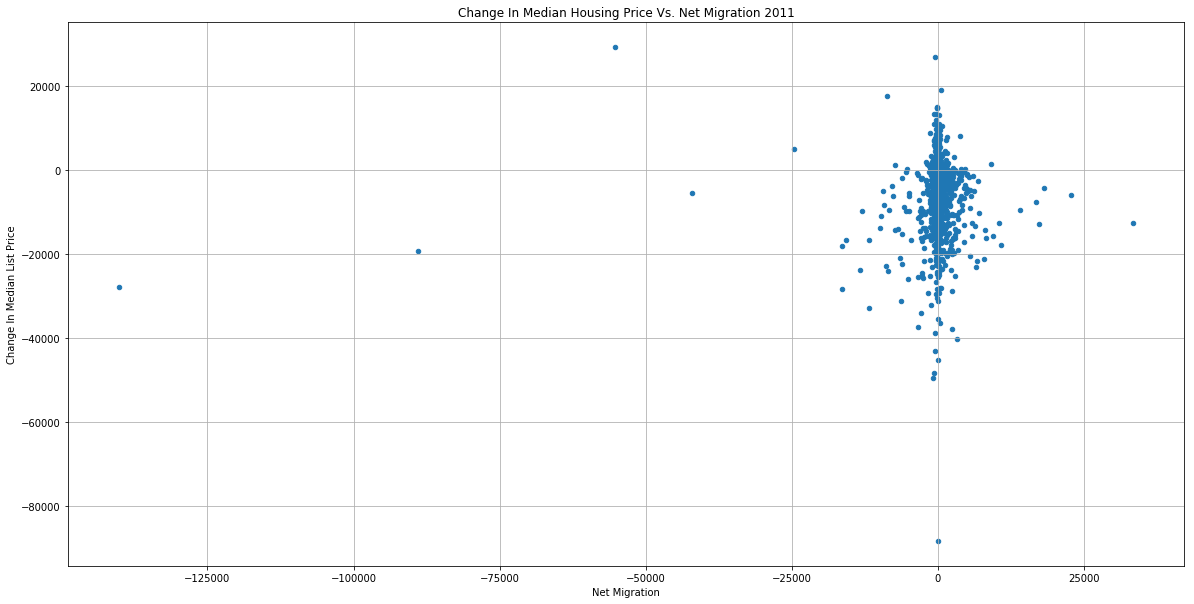

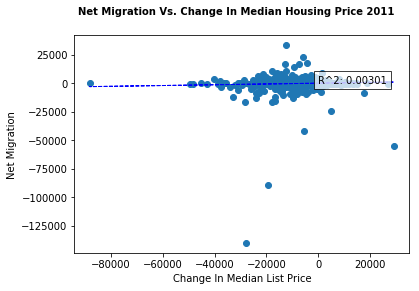

Rsqr: 0.003011827447351983


<Figure size 7200x4800 with 0 Axes>

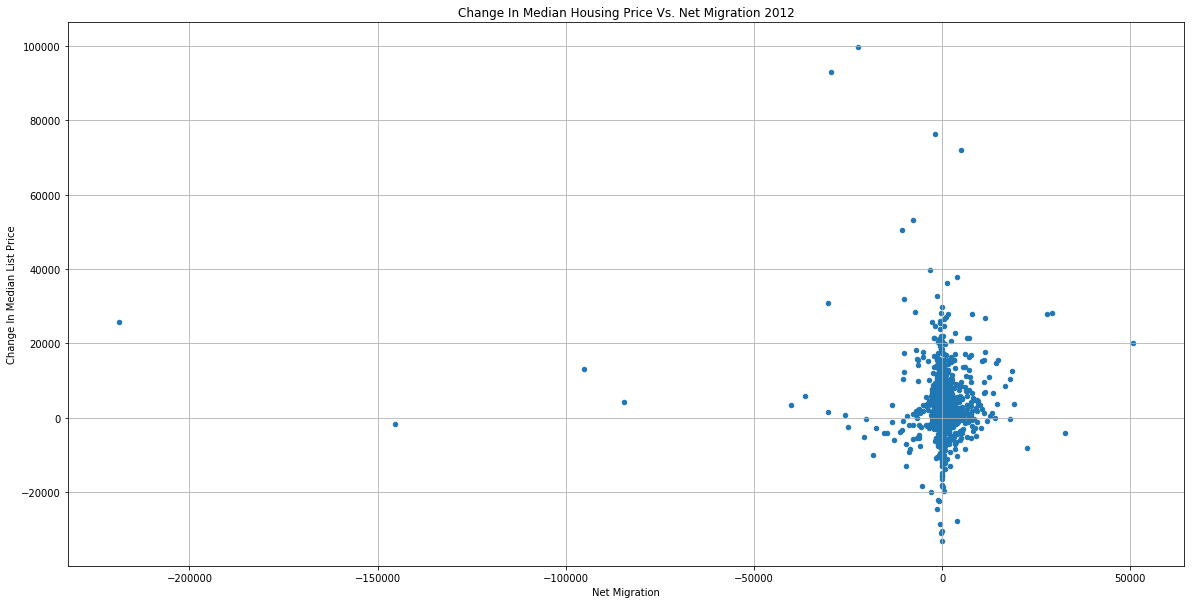

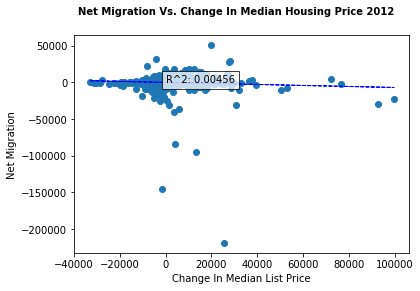

Rsqr: 0.004558566518283712


<Figure size 7200x4800 with 0 Axes>

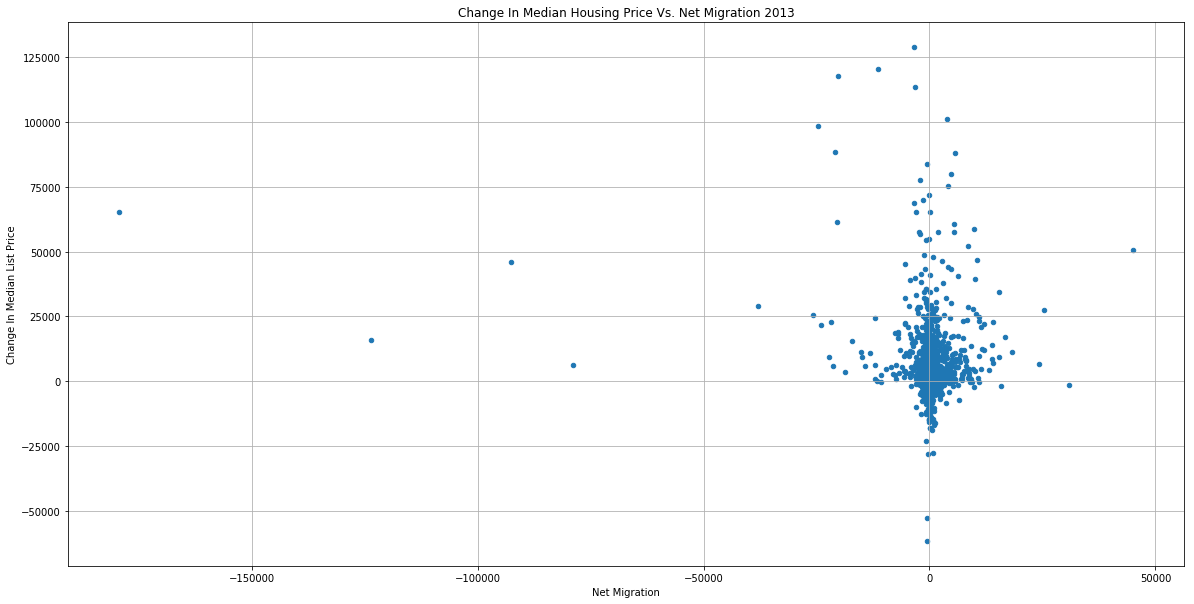

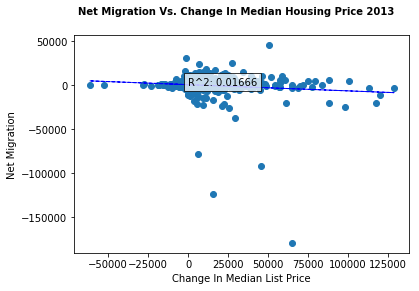

Rsqr: 0.01665813928083493


<Figure size 7200x4800 with 0 Axes>

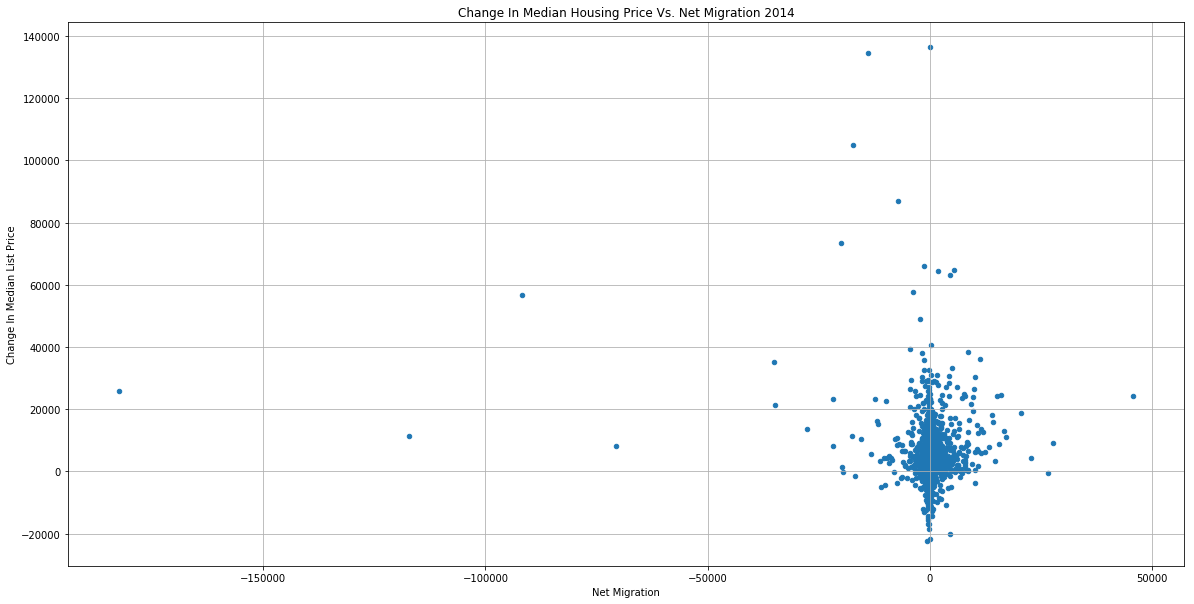

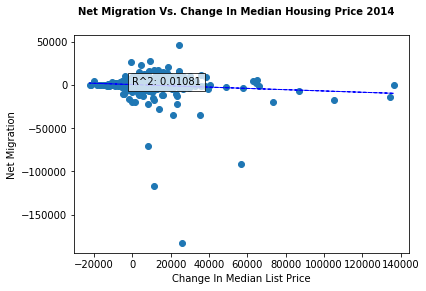

Rsqr: 0.010808997283729811


<Figure size 7200x4800 with 0 Axes>

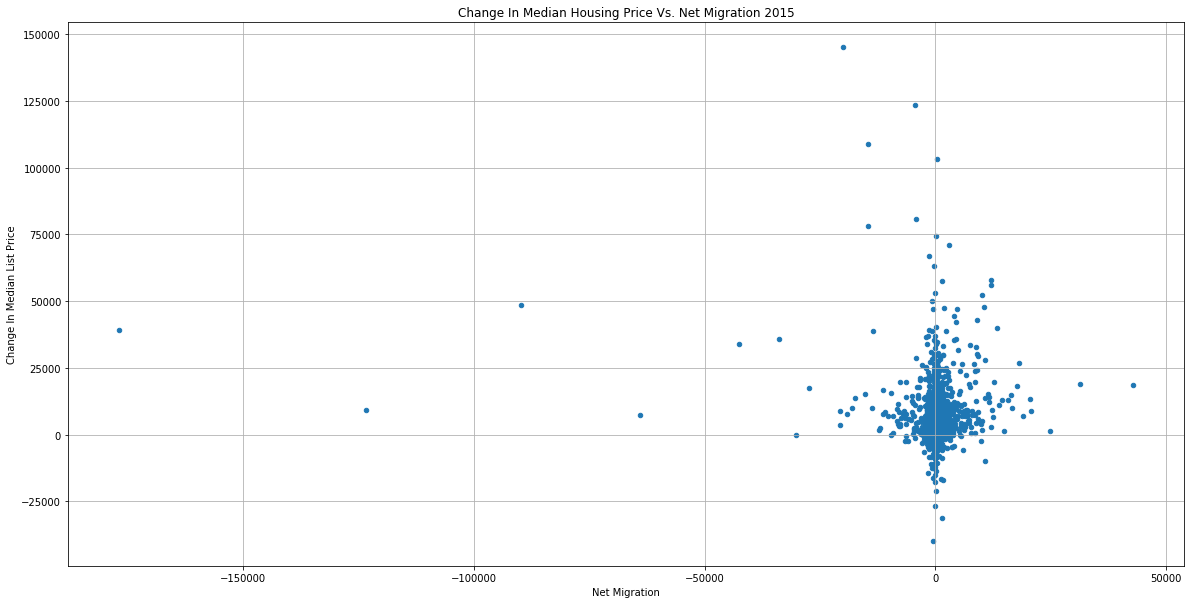

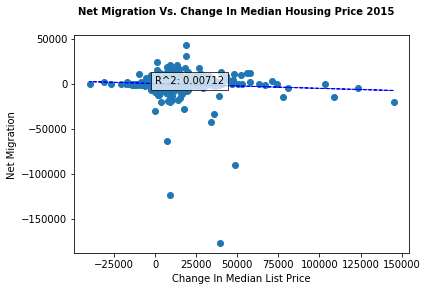

Rsqr: 0.0071247956819612225


<Figure size 7200x4800 with 0 Axes>

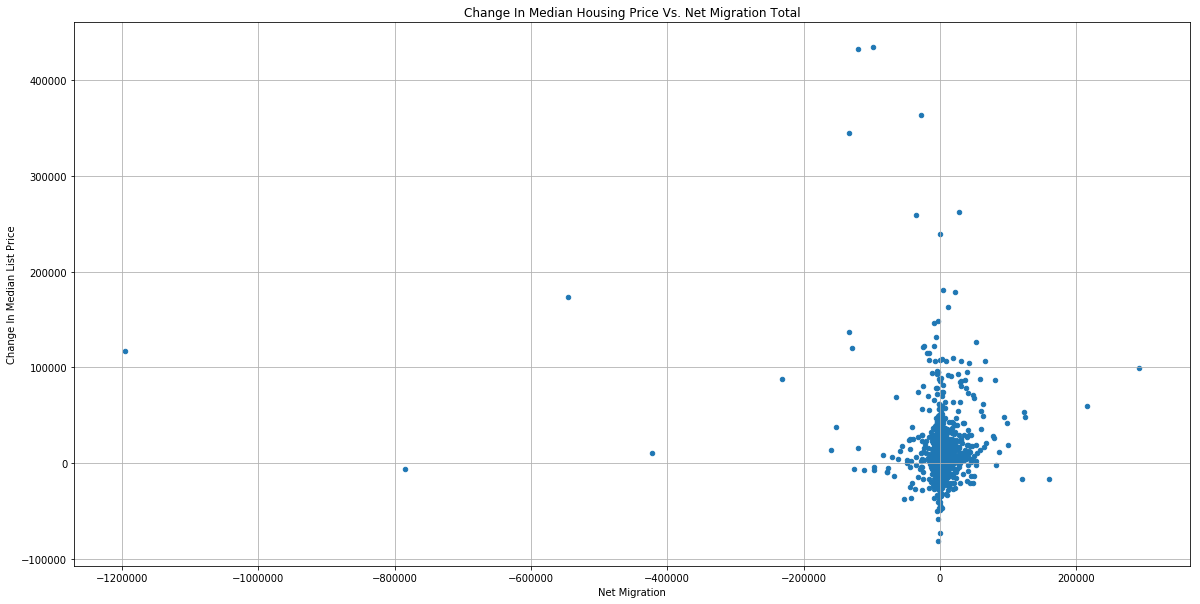

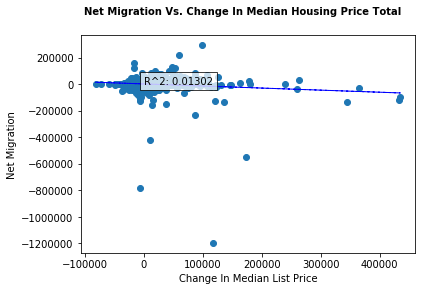

Rsqr: 0.013021091016942548


<Figure size 7200x4800 with 0 Axes>

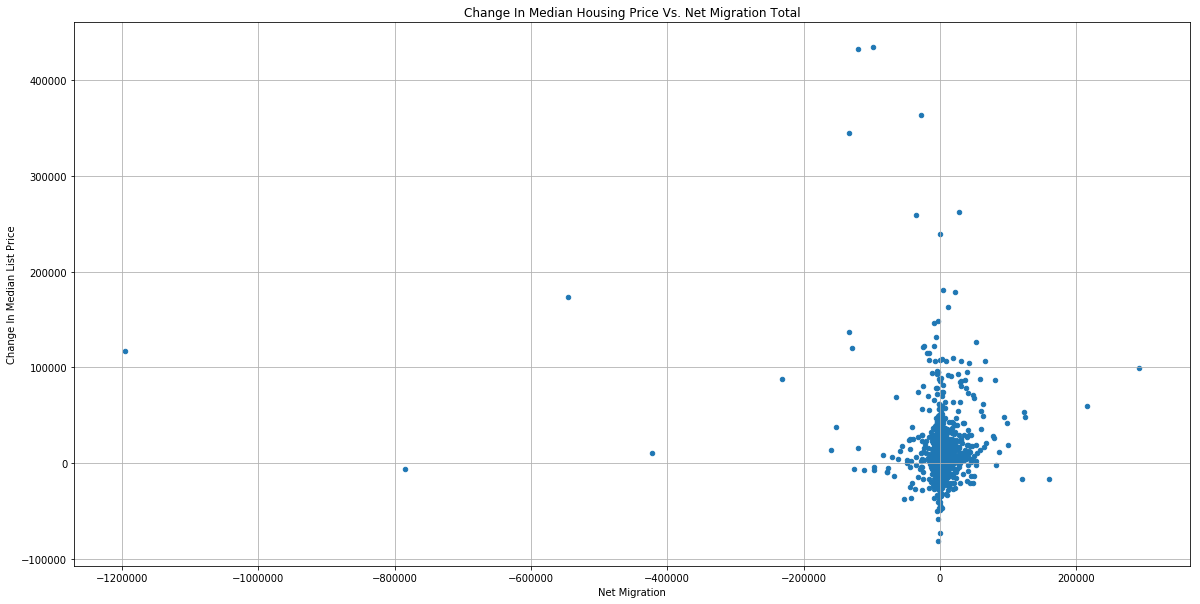

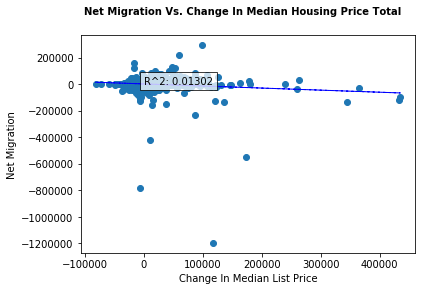

Rsqr: 0.013021091016942548


In [20]:
#Scatterplot compares year of census to year+1 of zillow. Also includes total
years.append("Total")


for year in years:
    #added try so we can include total in loop since you can't add 1 to a string, year2 used for zillow
    try:
         year2 = str(int(year) + 1)
    except: year2 = year
        
    plt.figure(dpi=1200)
   
    merge_output.plot(kind="scatter", x=f"{year}NET", 
                                              y=f"{year2} Difference", 
                                              grid=True, figsize=(20,10),
                                              title=f"Change In Median Housing Price Vs. Net Migration {year2}")

    plt.ylabel("Change In Median List Price")
    plt.xlabel("Net Migration")
    
    difference = merge_output[f"{year2} Difference"]
    moved_net = merge_output[f"{year}NET"]
    
    vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(difference, moved_net)
    vc_fit = vc_slope * difference + vc_int

    fig, (ax1) = plt.subplots(1, sharex=True)
    fig.suptitle(f"Net Migration Vs. Change In Median Housing Price {year2}", fontsize=10, fontweight="bold")
    plt.ylabel("Net Migration")
    plt.xlabel("Change In Median List Price")

    #ax1.set_xlim(min(moved_net)-10000, max(moved_net)+10000)
    #ax1.set_ylim(min(difference)-10000, max(difference)+10000)
    ax1.plot(difference, moved_net, linewidth=0, marker="o")
    ax1.plot(difference, vc_fit, "b--", linewidth=1)
    plt.text(-5,-5,"R^2: "+str(round(vc_r**2,5)),bbox=dict(facecolor='white', alpha=0.75))    
    plt.savefig(f"Census vs Zillow Scatter (SELECT STATES-PERC CHANGE) {year2}.png",dpi = 1000)
    plt.show()
    print("Rsqr:", vc_r**2)